# DEEP learning 

## Vision par ordinateur

In [469]:
from sklearn import datasets
import  numpy  as np

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

import matplotlib.pyplot as plt

In [470]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  , Activation , Flatten
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [471]:
import pickle 

In [472]:


# Load the CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch_1 = unpickle('dataset/cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('dataset/cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('dataset/cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('dataset/cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('dataset/cifar-10-batches-py/data_batch_5')
test_batch = unpickle('dataset/cifar-10-batches-py/test_batch')

# Concatenate the batches into a single data array
data_train = np.concatenate([batch_1[b'data'], batch_2[b'data'], batch_3[b'data'], batch_4[b'data'], batch_5[b'data']])
labels_train = batch_1[b'labels'] + batch_2[b'labels'] + batch_3[b'labels'] + batch_4[b'labels'] + batch_5[b'labels']
data_test = test_batch[b'data']
labels_test = test_batch[b'labels']


In [473]:
data_train_shape= data_train[labels_train].shape[0]
data_test_shape= data_test[labels_test].shape[0]
# Reshape the data arrays to be compatible with the original images
data_train = data_train.reshape((data_train_shape, 3, 32, 32)).transpose((0, 2, 3, 1))
data_test = data_test.reshape((data_test_shape, 3, 32, 32)).transpose((0, 2, 3, 1))




x_train = data_train.reshape((data_train_shape, 32, 32, 3))
x_test = data_test.reshape((data_test_shape, 32, 32, 3))


# Create y_train and y_test arrays
y_train = np.array(labels_train)
y_test = np.array(labels_test)
 

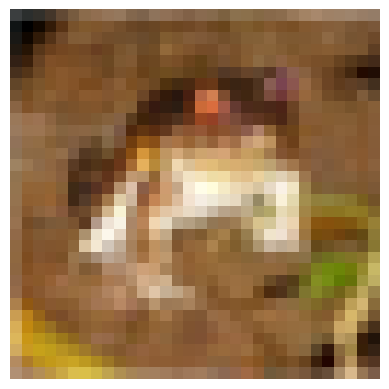

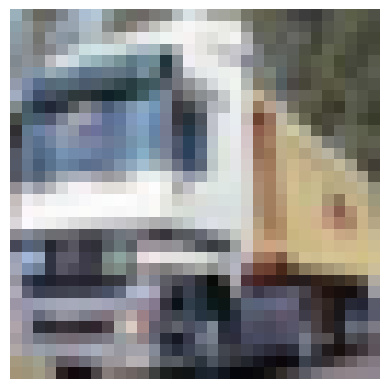

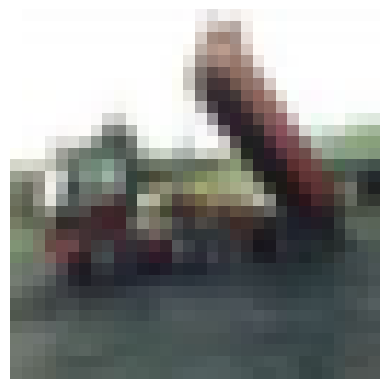

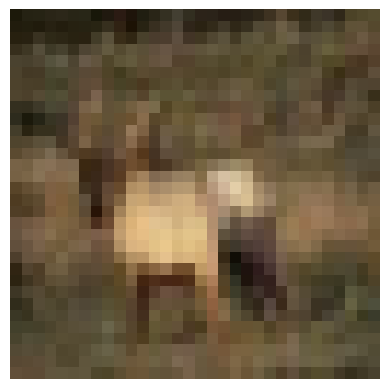

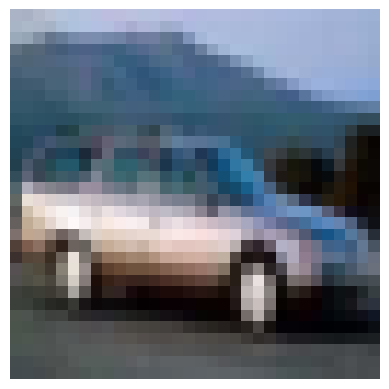

In [474]:
for i in range(0,5):
    image = x_train[i] 
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [475]:
print("x_train.shape : : " , x_train.shape )
print("x_test.shape : : " , x_test.shape )
print("y_train.shape : : " , y_train.shape )
print("y_test.shape : : " , y_test.shape )

x_train.shape : :  (50000, 32, 32, 3)
x_test.shape : :  (10000, 32, 32, 3)
y_train.shape : :  (50000,)
y_test.shape : :  (10000,)


<strong> Ce code représente la création et l'entraînement d'un réseau de neurones convolutionnels (CNN) pour la classification d'images. Voici une explication ligne par ligne : </strong>

 

* Ces deux lignes normalisent les données d'entrée, en divisant toutes les valeurs par 255.0. Cela permet de mettre toutes les valeurs des pixels des images dans la plage [0, 1], ce qui facilite l'entraînement du modèle.


In [476]:
x_train = x_train / 255.0
x_test = x_test / 255.0


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 256)       7168      
                                                                 
 activation_10 (Activation)  (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 13, 13, 256)       590080    
                                                                 
 activation_11 (Activation)  (None, 13, 13, 256)       0         
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                

* Sequential : Cette ligne crée un modèle vide séquentiel, qui est un empilement linéaire de couches de neurones.

In [ ]:

model = Sequential()


* Ces trois lignes ajoutent une couche de convolution avec 256 filtres de taille 3x3, suivie d'une fonction d'activation ReLU et d'une couche de pooling maximale de taille 2x2. Cette première couche permet de capturer les caractéristiques bas niveau de l'image.

*MaxPooling2D*

La ligne model.add(MaxPooling2D(pool_size=(2, 2))) ajoute une couche de pooling maximale au modèle.

Le pooling est une technique qui permet de réduire la dimensionnalité de l'image, tout en conservant les informations importantes. Dans le cas de la couche de pooling maximale, on cherche la valeur maximale dans chaque zone de la carte de caractéristiques.

Le paramètre pool_size spécifie la taille de la fenêtre de pooling. Dans ce cas, (2, 2) indique que la fenêtre de pooling est de taille 2x2, ce qui signifie que la sortie de cette couche sera une carte de caractéristiques avec une résolution spatiale réduite de moitié par rapport à l'entrée.

En résumé, la couche de pooling maximale réduit la dimensionnalité de l'image, ce qui permet de réduire le temps d'entraînement et de prévenir le surapprentissage, tout en préservant les informations les plus importantes pour la classification des images.

In [ ]:

# Crée un réseau de convolution CNN
model.add(Conv2D(256, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


* Ces trois lignes ajoutent une deuxième couche de convolution avec 256 filtres de taille 3x3, suivie d'une fonction d'activation ReLU et d'une couche de pooling maximale de taille 2x2. Cette deuxième couche permet de capturer des caractéristiques plus abstraites de l'image.

In [ ]:

#  ajouter une autre couche de convolution

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


* Cette ligne ajoute une couche Flatten, qui transforme la sortie de la couche de convolution en un vecteur unidimensionnel, pour préparer l'entrée de la couche entièrement connectée.



In [ ]:

model.add(Flatten())


* Ces trois lignes ajoutent deux couches entièrement connectées avec 64 et 10 neurones respectivement, suivies d'une fonction d'activation sigmoid pour la classification des images en 10 classes.

In [ ]:

# Le complément connéectée

model.add(Dense(64))
model.add(Dense(10))
model.add(Activation("sigmoid"))



* Cette ligne compile le modèle en spécifiant l'optimiseur Adam, la fonction de perte sparse_categorical_crossentropy pour la classification avec des étiquettes entières, et la métrique d'évaluation de la précision

In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.summary()


* Le nombre de lots (ou mini-lots) est calculé en divisant le nombre total d'échantillons d'entraînement par la taille du lot (batch_size).



In [477]:
# entrainemnt du model 
model.fit(x_train , y_train , batch_size=50 , epochs=20)

Epoch 1/20
1000/1000 [==============================] - 192s 192ms/step - loss: 1.4129 - sparse_categorical_accuracy: 0.4950
Epoch 2/20
1000/1000 [==============================] - 190s 190ms/step - loss: 1.0835 - sparse_categorical_accuracy: 0.6247
Epoch 3/20
1000/1000 [==============================] - 191s 191ms/step - loss: 0.9704 - sparse_categorical_accuracy: 0.6641
Epoch 4/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.9002 - sparse_categorical_accuracy: 0.6894
Epoch 5/20
1000/1000 [==============================] - 193s 193ms/step - loss: 0.8410 - sparse_categorical_accuracy: 0.7103
Epoch 6/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.7980 - sparse_categorical_accuracy: 0.7251
Epoch 7/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.7633 - sparse_categorical_accuracy: 0.7358
Epoch 8/20
1000/1000 [==============================] - 191s 191ms/step - loss: 0.7339 - sparse_categorical_accuracy: 0.7458


In [478]:
model.evaluate(x_test ,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.9862 - sparse_categorical_accuracy: 0.7036


[0.9862356185913086, 0.7035999894142151]